In [1]:
# Application Programming Interface

In [4]:
! pip install pycoingecko
! pip install plotly
! pip install mplfinance

     |████████████████████████████████| 62 kB 1.4 MB/s eta 0:00:011


In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc


In [10]:
dict_ = {'a':[11,21,31], 'b':[12,22,32]}

In [12]:
df = pd.DataFrame(dict_)
df

,a,b
0,11,12
1,21,22
2,31,32


In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [15]:
df.mean()

a    21.0
b    22.0
dtype: float64

In [17]:
#Rest API’s function by sending a request, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In [19]:
#REST APIs
cg = CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id = 'bitcoin', vs_currency = 'usd', days = 30)

In [20]:
type(bitcoin_data)

dict

In [30]:
a = pd.DataFrame(bitcoin_data)
a.head()

,prices,market_caps,total_volumes
0,"[1634821357454, 65145.76732268202]","[1634821357454, 1227593700592.1724]","[1634821357454, 53603294276.91672]"
1,"[1634825197822, 64662.11009680859]","[1634825197822, 1229475866381.413]","[1634825197822, 50750377779.182526]"
2,"[1634828785403, 63880.41820228637]","[1634828785403, 1207515968959.3901]","[1634828785403, 49598309164.68173]"
3,"[1634832447284, 63295.47788271768]","[1634832447284, 1198017039207.754]","[1634832447284, 50160513891.22271]"
4,"[1634835947486, 62962.93115309538]","[1634835947486, 1186978069352.8076]","[1634835947486, 49437489052.698395]"


In [21]:
bitcoin_price_data = bitcoin_data['prices']

In [23]:
bitcoin_price_data[0:5]

[[1634821357454, 65145.76732268202],
 [1634825197822, 64662.11009680859],
 [1634828785403, 63880.41820228637],
 [1634832447284, 63295.47788271768],
 [1634835947486, 62962.93115309538]]

In [31]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp_', 'Price'])

In [32]:
data

,TimeStamp_,Price
0,1634821357454,65145.767323
1,1634825197822,64662.110097
2,1634828785403,63880.418202
3,1634832447284,63295.477883
4,1634835947486,62962.931153
...,...,...
717,1637399330837,58864.975273
718,1637402410363,58843.724004
719,1637406123125,58619.917185
720,1637409810373,58905.917292


In [55]:
data['date'] = data['TimeStamp_'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))


In [57]:
data.head()

,TimeStamp_,Price,date
0,1634821357454,65145.767323,2021-10-21
1,1634825197822,64662.110097,2021-10-21
2,1634828785403,63880.418202,2021-10-21
3,1634832447284,63295.477883,2021-10-21
4,1634835947486,62962.931153,2021-10-21


In [66]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})

In [62]:
a = pd.DataFrame(candlestick_data)

In [63]:
a.head()

Price                                          
                     min           max         first          last
date                                                              
2021-10-21  62386.667168  65145.767323  65145.767323  62491.315744
2021-10-22  60405.151363  63901.747336  62178.641085  60841.015739
2021-10-23  60515.637907  61899.451064  61001.276330  61428.539401
2021-10-24  60171.631919  61572.140434  61572.140434  61201.284537
2021-10-25  61119.935107  63917.434158  61119.935107  63333.083275

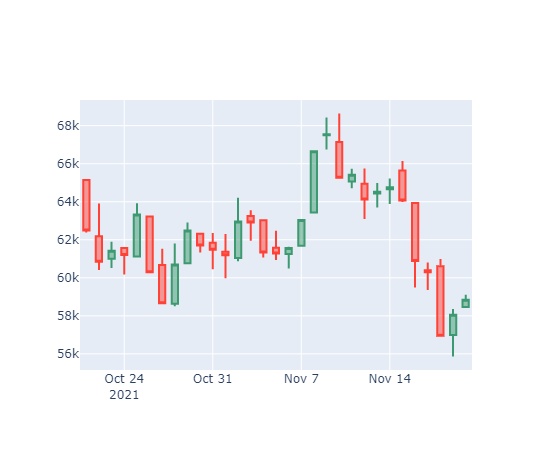

In [76]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])])
fig.update_layout(xaxis_rangeslider_visible=False)

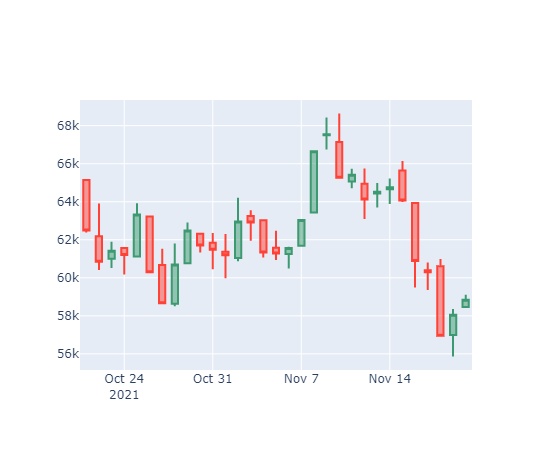

In [77]:
fig.show()